### Imports

In [1]:
import numpy as np
from chainconsumer import ChainConsumer
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'
%config InlineBackend.rc = {'figure.facecolor': 'w'}

###

sim_colors = {}

custom_cet_fdm = ["#EE99FF","#E566FF","#DD33FF","#D400FF","#AA00CC","#7F0099","#550066"]
sim_colors['fdm_25.9e-22eV'] = custom_cet_fdm[1]
sim_colors['fdm_69.4e-22eV'] = custom_cet_fdm[2]
sim_colors['fdm_113e-22eV'] = custom_cet_fdm[3]
sim_colors['fdm_151e-22eV'] = custom_cet_fdm[4]
sim_colors['fdm_185e-22eV'] = custom_cet_fdm[5]
sim_colors['fdm_490e-22eV'] = custom_cet_fdm[6]

custom_blues_complement = ["#FFBB99", "#FF9966", "#FF7733", "#FF5500", "#CC4400", "#993300", "#662200","#000000"]
sim_colors['wdm_3'] = custom_blues_complement[1]
sim_colors['wdm_4'] = custom_blues_complement[2]
sim_colors['wdm_5'] = custom_blues_complement[3]
sim_colors['wdm_6'] = custom_blues_complement[4]
sim_colors['wdm_6.5'] = custom_blues_complement[5]
sim_colors['wdm_10'] = custom_blues_complement[6]

###

models = ['fdm_25.9e-22eV', 'fdm_69.4e-22eV', 'fdm_113e-22eV', 'fdm_151e-22eV', 'fdm_185e-22eV', 'fdm_490e-22eV']
masses = {'fdm_25.9e-22eV': 25.9, 'fdm_69.4e-22eV': 69.4, 'fdm_113e-22eV': 113,
          'fdm_151e-22eV': 151, 'fdm_185e-22eV': 185, 'fdm_490e-22eV': 490}
labels = {'fdm_25.9e-22eV': r'$m_{\mathrm{FDM,22}}=25.9$', 'fdm_69.4e-22eV': r'$m_{\mathrm{FDM,22}}=69.4$',
          'fdm_113e-22eV': r'$m_{\mathrm{FDM,22}}=113$', 'fdm_151e-22eV': r'$m_{\mathrm{FDM,22}}=151$',
          'fdm_185e-22eV': r'$m_{\mathrm{FDM,22}}=185$', 'fdm_490e-22eV': r'$m_{\mathrm{FDM,22}}=490$'}

models_wdm = ['wdm_3', 'wdm_4', 'wdm_5', 'wdm_6', 'wdm_6.5', 'wdm_10']
masses_wdm = {'wdm_3': 3., 'wdm_4': 4., 'wdm_5': 5., 'wdm_6': 6., 'wdm_6.5': 6.5, 'wdm_10': 10.}

In [2]:
base_mpeak = np.logspace(np.log10(3e5*300/0.7),np.log10(9e5*1.3e5/0.7),100)
x=0.5*(base_mpeak[1:]+base_mpeak[:-1])

def Mhm_fdm(mfdm):
    return 4.5e10 * mfdm**(-1.41)

def Mhm(mwdm):
    return 4.3e8 * (mwdm/3.)**(-3.564)

def f_ncdm(Mpeak,Mhm,alpha,beta,gamma):
    return (1.+(alpha*Mhm/Mpeak)**beta)**(-1.*gamma)

### Plot posterior

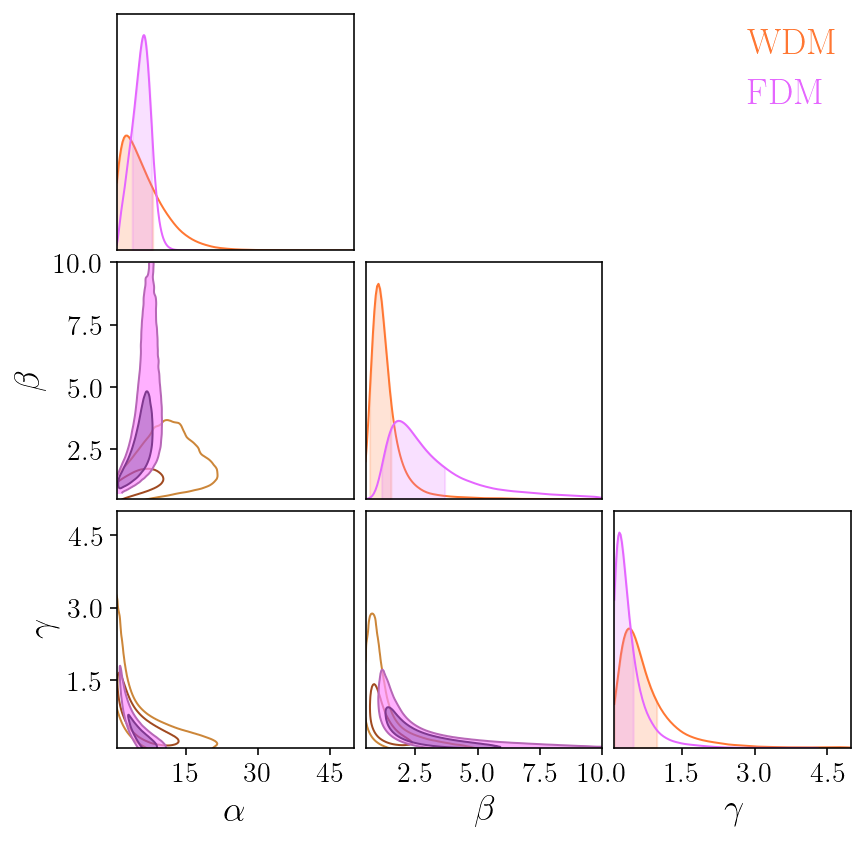

In [3]:
#Load this from Zenodo distribution: https://doi.org/10.5281/zenodo.14649137
samples = np.load('flat_samples_wdm.npy')
samples = samples[:,6:]

samples_fdm = np.load('flat_samples_fdm.npy')
samples_fdm = samples_fdm[:,6:]

###

c = ChainConsumer()
c.add_chain(samples, parameters=[r"$\alpha$",r"$\beta$",r"$\gamma$"],name=r"$\mathrm{WDM}$")

c.add_chain(samples_fdm, parameters=[r"$\alpha$",r"$\beta$",r"$\gamma$"],name=r"$\mathrm{FDM}$")
c.configure(colors=["#FF7733","#E566FF"], shade=[False,True], bar_shade=True,spacing=1.0,
                diagonal_tick_labels=False, tick_font_size=14, label_font_size=18, sigma2d=False,max_ticks=4, 
                summary=[False,True],kde=False)

fig = c.plotter.plot(figsize=(6,6), extents=[[0.5,50],[0.5,10],[0.1,5]],display=True)

### Plot SHMF suppression

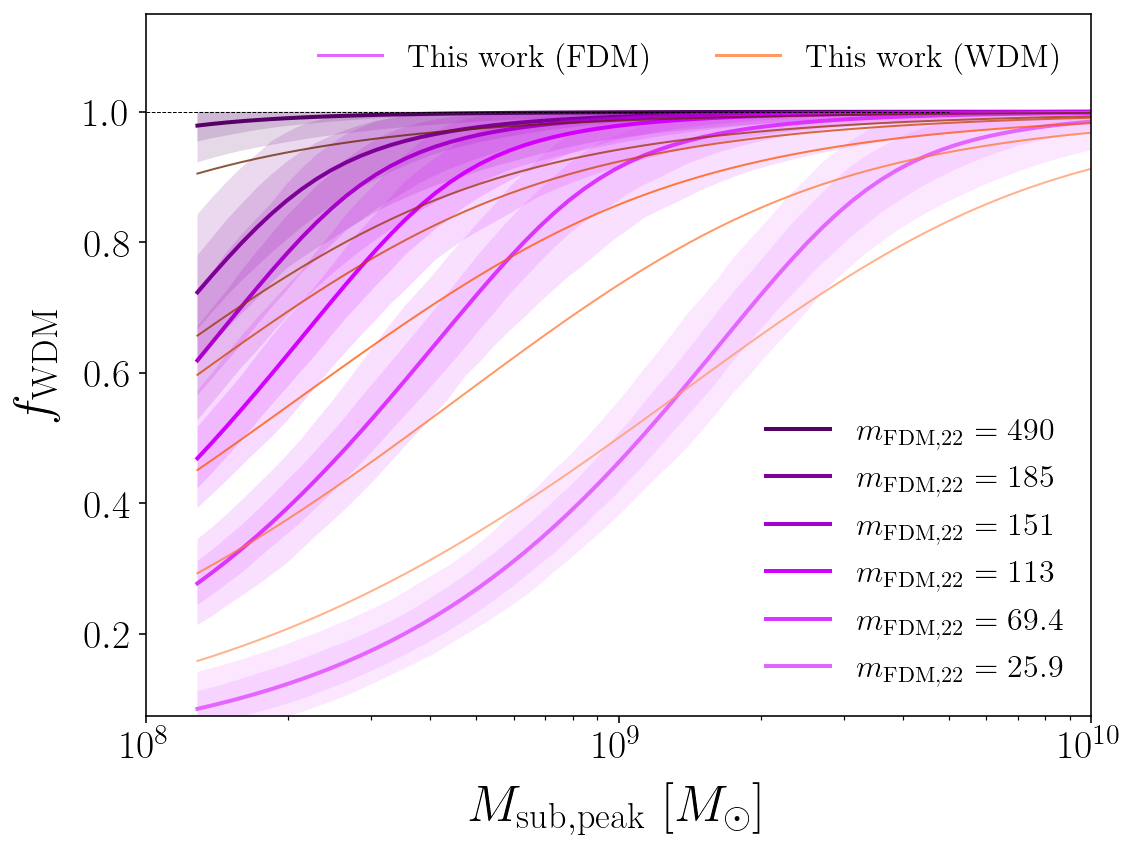

In [4]:
plt.figure(figsize=(8,6))
plt.xscale('log')

###
    
for model in ['fdm_25.9e-22eV']:
    this_work = plt.plot(base_mpeak[:-1],-1.*np.ones(len(base_mpeak[:-1])),c=sim_colors[model],
                         label=r'$\mathrm{This\ work\ (FDM)}$')
    this_work_wdm = plt.plot(base_mpeak[:-1],-1.*np.ones(len(base_mpeak[:-1])),c=sim_colors['wdm_3'],
                             label=r'$\mathrm{This\ work\ (WDM)}$')

first_legend = plt.legend(handles=[this_work[0],this_work_wdm[0]],ncol=2,fontsize=16,frameon=False,loc=1)
plt.gca().add_artist(first_legend)

###

fdm_plot = []
for model in models[::-1]:
    
    ###
    
    pred = []
    for rand_int in np.random.randint(samples_fdm.shape[0],size=500):
        pred.append(f_ncdm(x,Mhm_fdm(masses[model]),samples_fdm[rand_int,0],samples_fdm[rand_int,1],samples_fdm[rand_int,2]))
         
    fdm_plot.append(plt.plot(base_mpeak[:-1],np.mean(pred,axis=0),c=sim_colors[model],label=labels[model],lw=2))
    
    plt.fill_between(base_mpeak[:-1],np.percentile(pred,16,axis=0),np.percentile(pred,84,axis=0),
                    alpha=0.15,facecolor=sim_colors[model])

    plt.fill_between(base_mpeak[:-1],np.percentile(pred,2.5,axis=0),np.percentile(pred,97.5,axis=0),
                    alpha=0.15,facecolor=sim_colors[model])
        
    ###
    
for model in models_wdm[::-1]:
    pred = []
    for rand_int in np.random.randint(samples.shape[0],size=500):
        pred.append(f_ncdm(x,Mhm(masses_wdm[model]),samples[rand_int,0],samples[rand_int,1],samples[rand_int,2]))
         
    plt.plot(base_mpeak[:-1],np.mean(pred,axis=0),c=sim_colors[model],alpha=0.75,lw=1)
    
###

plt.legend(handles=[fdm_plot[0][0],fdm_plot[1][0],fdm_plot[2][0],fdm_plot[3][0],fdm_plot[4][0],fdm_plot[5][0]],
           loc=4,fontsize=16,frameon=False,framealpha=1.0,ncol=1)
plt.plot(np.linspace(1e8,5e9,10),np.ones(10),'k--',lw=0.5)

###

plt.xlim(1e8,10**10)
plt.xticks([10**8,10**9,10**10],[r'$10^8$',r'$10^9$',r'$10^{10}$'], fontsize=20)
plt.ylim(0.075,1.15)
plt.yticks([0.2,0.4,0.6,0.8,1.0],[r'$0.2$',r'$0.4$',r'$0.6$',r'$0.8$',r'$1.0$'], fontsize=20)
plt.xlabel(r'$M_{\rm{sub,peak}}\ [M_{\mathrm{\odot}}]$',fontsize=26,labelpad=8)
plt.ylabel(r'$f_{\mathrm{WDM}}$', fontsize=26, labelpad=12)

###

plt.tight_layout()
plt.show()